# Clustering film Dreamworks
Importiamo tutte le librerie Python necessarie per la nostra analisi e il file Excel con le trame dei film prese da Wikipedia inglese.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn import metrics
from time import time
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score

In [2]:
film = pd.read_excel('Film Dreamworks.xlsx')

In [3]:
film

,Nome Film,Sinossi
0,Shrek,Shrek is an anti-social and highly territorial...
1,Shrek 2,Newlyweds Shrek and Princess Fiona return from...
2,Shrek 3,"Sometime after the events of the second film, ..."
3,Shrek 4,"Years ago, King Harold and Queen Lillian were ..."
4,Gatto con gli stivali,Puss in Boots is a Spanish-speaking anthropomo...
5,Gatto con gli stivali 2,"While hosting a party in the town of Del Mar, ..."
6,Kung fu Panda,"In the Valley of Peace, a land in Ancient Chin..."
7,Kung fu Panda 2,"Long ago, the peacock rulers of Gongmen City i..."
8,Kung fu Panda 3,"In the Spirit Realm, Master Oogway fights Gene..."
9,Cattivissimo Me,Longtime supervillain Gru has his pride hurt w...


In [4]:
nomi_film = film.loc[:, "Nome Film"]

In [5]:
sinossi = film.loc[:, "Sinossi"]

In [6]:
sinossi

0     Shrek is an anti-social and highly territorial...
1     Newlyweds Shrek and Princess Fiona return from...
2     Sometime after the events of the second film, ...
3     Years ago, King Harold and Queen Lillian were ...
4     Puss in Boots is a Spanish-speaking anthropomo...
5     While hosting a party in the town of Del Mar, ...
6     In the Valley of Peace, a land in Ancient Chin...
7     Long ago, the peacock rulers of Gongmen City i...
8     In the Spirit Realm, Master Oogway fights Gene...
9     Longtime supervillain Gru has his pride hurt w...
10    A mysterious aircraft steals a highly potent m...
11    Minions are small, yellow pill-shaped creature...
12    In 1976, an eleven-year-old Gru dreams of beco...
13    Married Anti-Villain League (AVL) agents Felon...
14    In New York City, Alex the lion lives in the C...
15    In Kenya,[6] the alpha lion Zuba tries to teac...
16    The penguins and the chimpanzees leave Africa ...
17    In Antarctica, penguin chick brothers Skip

In [7]:
# Ora creiamo il vettore con le features

vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=1,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(sinossi)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.014 s
n_samples: 18, n_features: 2375


In [8]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [9]:
metodo = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                metric = 'cosine',
                                linkage = 'complete')
clustering = metodo.fit(X_tfidf.toarray())

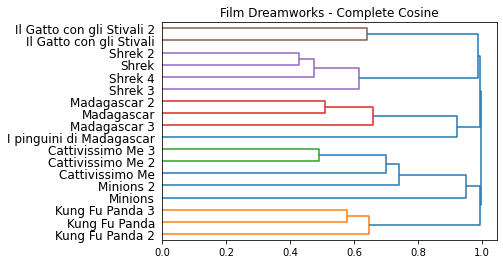

In [10]:
plt.title("Film Dreamworks - Complete Cosine")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level",
                labels = ['Shrek', 'Shrek 2', 'Shrek 3', 'Shrek 4', 'Il Gatto con gli Stivali', 'Il Gatto con gli Stivali 2',
                          'Kung Fu Panda', 'Kung Fu Panda 2', 'Kung Fu Panda 3', 'Cattivissimo Me', 
                          'Cattivissimo Me 2', 'Minions', 'Minions 2', 'Cattivissimo Me 3', 'Madagascar',
                          'Madagascar 2', 'Madagascar 3', 'I pinguini di Madagascar'], 
                orientation = 'right'
               )
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [11]:
nomi_film

0                        Shrek
1                      Shrek 2
2                      Shrek 3
3                      Shrek 4
4        Gatto con gli stivali
5      Gatto con gli stivali 2
6                Kung fu Panda
7              Kung fu Panda 2
8              Kung fu Panda 3
9              Cattivissimo Me
10           Cattivissimo Me 2
11                     Minions
12                   Minions 2
13           Cattivissimo Me 3
14                  Madagascar
15                Madagascar 2
16                Madagascar 3
17    I pinguini di Madagascar
Name: Nome Film, dtype: object

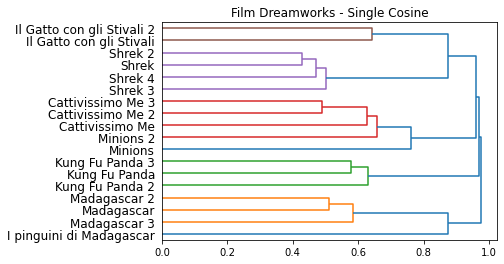

In [12]:
metodo = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                metric = 'cosine',
                                linkage = 'single')
clustering = metodo.fit(X_tfidf.toarray())

plt.title("Film Dreamworks - Single Cosine")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level",
                labels = ['Shrek', 'Shrek 2', 'Shrek 3', 'Shrek 4', 'Il Gatto con gli Stivali', 'Il Gatto con gli Stivali 2',
                          'Kung Fu Panda', 'Kung Fu Panda 2', 'Kung Fu Panda 3', 'Cattivissimo Me', 
                          'Cattivissimo Me 2', 'Minions', 'Minions 2', 'Cattivissimo Me 3', 'Madagascar',
                          'Madagascar 2', 'Madagascar 3', 'I pinguini di Madagascar'], 
                orientation = 'right'
               )
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

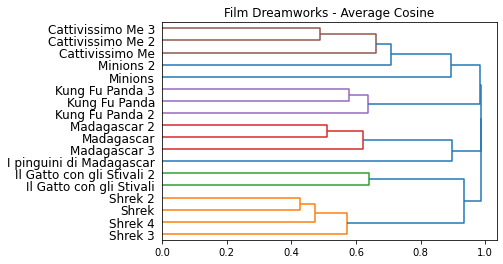

In [13]:
metodo = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                metric = 'cosine',
                                linkage = 'average')
clustering = metodo.fit(X_tfidf.toarray())

plt.title("Film Dreamworks - Average Cosine")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level",
                labels = ['Shrek', 'Shrek 2', 'Shrek 3', 'Shrek 4', 'Il Gatto con gli Stivali', 'Il Gatto con gli Stivali 2',
                          'Kung Fu Panda', 'Kung Fu Panda 2', 'Kung Fu Panda 3', 'Cattivissimo Me', 
                          'Cattivissimo Me 2', 'Minions', 'Minions 2', 'Cattivissimo Me 3', 'Madagascar',
                          'Madagascar 2', 'Madagascar 3', 'I pinguini di Madagascar'],   
                orientation = 'right'
               )
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

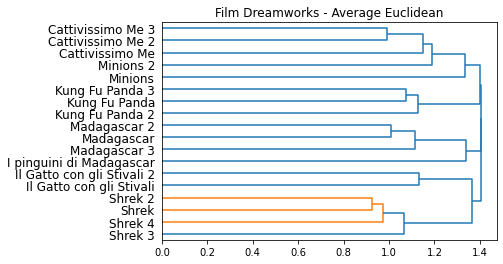

In [14]:
metodo = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                metric = 'euclidean',
                                linkage = 'average')
clustering = metodo.fit(X_tfidf.toarray())

plt.title("Film Dreamworks - Average Euclidean")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level",
                labels = ['Shrek', 'Shrek 2', 'Shrek 3', 'Shrek 4', 'Il Gatto con gli Stivali', 'Il Gatto con gli Stivali 2',
                          'Kung Fu Panda', 'Kung Fu Panda 2', 'Kung Fu Panda 3', 'Cattivissimo Me', 
                          'Cattivissimo Me 2', 'Minions', 'Minions 2', 'Cattivissimo Me 3', 'Madagascar',
                          'Madagascar 2', 'Madagascar 3', 'I pinguini di Madagascar'], 
                orientation = 'right'
               )
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

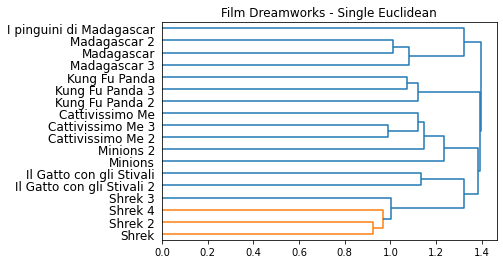

In [15]:
metodo = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                metric = 'euclidean',
                                linkage = 'single')
clustering = metodo.fit(X_tfidf.toarray())

plt.title("Film Dreamworks - Single Euclidean")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level",
                labels = ['Shrek', 'Shrek 2', 'Shrek 3', 'Shrek 4', 'Il Gatto con gli Stivali', 'Il Gatto con gli Stivali 2',
                          'Kung Fu Panda', 'Kung Fu Panda 2', 'Kung Fu Panda 3', 'Cattivissimo Me', 
                          'Cattivissimo Me 2', 'Minions', 'Minions 2', 'Cattivissimo Me 3', 'Madagascar',
                          'Madagascar 2', 'Madagascar 3', 'I pinguini di Madagascar'], 
                orientation = 'right'
               )
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

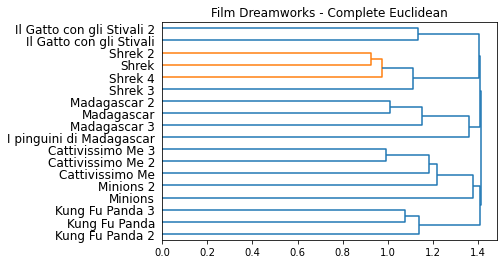

In [16]:
metodo = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                metric = 'euclidean',
                                linkage = 'complete')
clustering = metodo.fit(X_tfidf.toarray())

plt.title("Film Dreamworks - Complete Euclidean")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level",
                labels = ['Shrek', 'Shrek 2', 'Shrek 3', 'Shrek 4', 'Il Gatto con gli Stivali', 'Il Gatto con gli Stivali 2',
                          'Kung Fu Panda', 'Kung Fu Panda 2', 'Kung Fu Panda 3', 'Cattivissimo Me', 
                          'Cattivissimo Me 2', 'Minions', 'Minions 2', 'Cattivissimo Me 3', 'Madagascar',
                          'Madagascar 2', 'Madagascar 3', 'I pinguini di Madagascar'], 
                orientation = 'right'
               )
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## K-means clustering
Eseguiamo $K$-means clustering con 4 cluster.

In [17]:
kmeans = KMeans(n_clusters = 4, max_iter = 100, n_init = 20)

model_kmeans = kmeans.fit(X_tfidf)
cluster_ids, cluster_sizes = np.unique(model_kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")

y_pred = model_kmeans.predict(X_tfidf)
# for i in range(len(y_pred)):
#     print(f"{nomi_film[i]} nella classe {y_pred[i]}")
    
for i in range(len(cluster_ids)):
    film_classe = nomi_film[(y_pred[:] == i)]
    print(f"Nella classe {i} ci sono i film: {film_classe[:]}")

# print(
#     "True number of documents in each category according to the class labels: "
#     f"{category_sizes}"
# )

Number of elements assigned to each cluster: [5 5 4 4]
Nella classe 0 ci sono i film: 4      Gatto con gli stivali
5    Gatto con gli stivali 2
6              Kung fu Panda
7            Kung fu Panda 2
8            Kung fu Panda 3
Name: Nome Film, dtype: object
Nella classe 1 ci sono i film: 9       Cattivissimo Me
10    Cattivissimo Me 2
11              Minions
12            Minions 2
13    Cattivissimo Me 3
Name: Nome Film, dtype: object
Nella classe 2 ci sono i film: 0      Shrek
1    Shrek 2
2    Shrek 3
3    Shrek 4
Name: Nome Film, dtype: object
Nella classe 3 ci sono i film: 14                  Madagascar
15                Madagascar 2
16                Madagascar 3
17    I pinguini di Madagascar
Name: Nome Film, dtype: object
